In [3]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
stopwords = list(text.ENGLISH_STOP_WORDS)

In [2]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

In [3]:
train_df = train[["text","target"]]
test_df = test[["text"]]

In [5]:
train_df.isnull().sum()

text      0
target    0
dtype: int64

In [6]:
blanks = []
for i,text,target in train_df.itertuples():
    if text.isspace():
        blanks.append(i)
        
print(len(blanks),"blanks: ",blanks)

0 blanks:  []


In [7]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
# Split the train and test datasets
from sklearn.model_selection import train_test_split

X = train_df['text']
y = train_df['target'] 
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size = 0.33,random_state = 42)

In [10]:
# Checking model accuracies with and without stop words
def nb_func(stopwords = None):
    text_clf_nb = Pipeline([('tfidf',TfidfVectorizer(stop_words= stopwords)),
                           ('clf',MultinomialNB()),])
    text_clf_nb.fit(X_train,y_train)

    predictions = text_clf_nb.predict(X_val)
    print(metrics.confusion_matrix(y_val,predictions))
    print(metrics.classification_report(y_val,predictions))
    print(metrics.accuracy_score(y_val,predictions))

In [11]:
def lsvc_func(stopwords = None):
    text_clf_lsvc = Pipeline([('tfidf',TfidfVectorizer(stop_words = stopwords)),
                         ('clf',LinearSVC()),])
    text_clf_lsvc.fit(X_train,y_train)
    predictions =  text_clf_lsvc.predict(X_val)
    print(metrics.confusion_matrix(y_val,predictions))
    print(metrics.classification_report(y_val,predictions))
    print(metrics.accuracy_score(y_val,predictions))

In [12]:
print("With stopwords")
nb_func()
print("Without stopwords")
nb_func(stopwords)

With stopwords
[[1345  101]
 [ 395  672]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1446
           1       0.87      0.63      0.73      1067

    accuracy                           0.80      2513
   macro avg       0.82      0.78      0.79      2513
weighted avg       0.81      0.80      0.80      2513

0.8026263430163152
Without stopwords
[[1299  147]
 [ 359  708]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1446
           1       0.83      0.66      0.74      1067

    accuracy                           0.80      2513
   macro avg       0.81      0.78      0.79      2513
weighted avg       0.80      0.80      0.79      2513

0.7986470354158376


In [13]:
lsvc_func()

[[1204  242]
 [ 276  791]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1446
           1       0.77      0.74      0.75      1067

    accuracy                           0.79      2513
   macro avg       0.79      0.79      0.79      2513
weighted avg       0.79      0.79      0.79      2513

0.7938718662952646


In [15]:
#RUN THIS CELL TO ADD STOPWORDS TO THE LINEAR SVC PIPELINE:
text_cvec_nb2 = Pipeline([('countvec',CountVectorizer()),
                       ('clf',MultinomialNB()),])
text_cvec_nb2.fit(X_train, y_train)

Pipeline(steps=[('countvec', CountVectorizer()), ('clf', MultinomialNB())])

In [16]:
predictions =  text_cvec_nb2.predict(X_val)


print(metrics.confusion_matrix(y_val,predictions))
print(metrics.classification_report(y_val,predictions))
print(metrics.accuracy_score(y_val,predictions))

[[1263  183]
 [ 313  754]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1446
           1       0.80      0.71      0.75      1067

    accuracy                           0.80      2513
   macro avg       0.80      0.79      0.79      2513
weighted avg       0.80      0.80      0.80      2513

0.8026263430163152


In [17]:
text_cvec_lsvc2 = Pipeline([('cvec',CountVectorizer()),
                         ('clf',LinearSVC()),])
text_cvec_lsvc2.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('clf', LinearSVC())])

In [18]:
predictions =  text_cvec_lsvc2.predict(X_val)

from sklearn import metrics
print(metrics.confusion_matrix(y_val,predictions))
print(metrics.classification_report(y_val,predictions))
print(metrics.accuracy_score(y_val,predictions))

[[1207  239]
 [ 320  747]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1446
           1       0.76      0.70      0.73      1067

    accuracy                           0.78      2513
   macro avg       0.77      0.77      0.77      2513
weighted avg       0.78      0.78      0.78      2513

0.7775567051333068


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

/Users/snehgurdasani/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
count_vect = CountVectorizer(analyzer = 'word',token_pattern = r'\w{1,}')
count_vect.fit(X_train)

xtrain_count = count_vect.transform(X_train)
xval_count = count_vect.transform(X_val)

In [22]:
tfidf_vect = TfidfVectorizer(analyzer = 'word', token_pattern = r'\w{1,}',max_features = 5000)
tfidf_vect.fit(X_train)

xtrain_tfidf = tfidf_vect.transform(X_train)
xval_tfidf = tfidf_vect.transform(X_val)

tfidf_vect_ngram = TfidfVectorizer(analyzer = 'word', token_pattern = r'\w{1,}',max_features = 5000)
tfidf_vect_ngram.fit(X_train)

xtrain_tfidf_ngram = tfidf_vect_ngram.transform(X_train)
xval_tfidf_ngram = tfidf_vect_ngram.transform(X_val)

tfidf_vect_ngram_chars = TfidfVectorizer(analyzer = 'char', token_pattern = r'\w{1,}',max_features = 5000)
tfidf_vect_ngram_chars.fit(X_train)

xtrain_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(X_train)
xval_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(X_val)

/Users/snehgurdasani/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:501: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [23]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, y_val)

In [24]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xval_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, y_train, xval_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xval_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xval_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  0.8050139275766016
NB, WordLevel TF-IDF:  0.8089932351770792
NB, N-Gram Vectors:  0.8089932351770792
NB, CharLevel Vectors:  0.5913251094309591


In [25]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, y_train, xval_count)
print("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, y_train, xval_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, y_train, xval_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xval_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy)

LR, Count Vectors:  0.8034222045364107
LR, WordLevel TF-IDF:  0.8137684042976522
LR, N-Gram Vectors:  0.8137684042976522
LR, CharLevel Vectors:  0.6868284918424195


/Users/snehgurdasani/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
accuracy = train_model(svm.SVC(gamma='auto',kernel='linear'), xtrain_tfidf_ngram, y_train, xval_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)

SVM, N-Gram Vectors:  0.8070035813768405


In [27]:
accuracy = train_model(svm.SVC(gamma='auto',kernel='poly'), xtrain_tfidf_ngram, y_train, xval_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)

SVM, N-Gram Vectors:  0.575407879029049


In [28]:
accuracy = train_model(svm.SVC(gamma='auto',kernel='sigmoid'), xtrain_tfidf_ngram, y_train, xval_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)

SVM, N-Gram Vectors:  0.575407879029049


In [29]:
# SVM gives a better accuracy when the kernel is linear.

In [41]:
params = {
  'colsample_bynode': 0.8,
  'learning_rate': 1,
  'max_depth': 5,
  'num_parallel_tree': 100,
  'objective': 'binary:logistic',
  'subsample': 0.8,
  'tree_method': 'gpu_hist'
}

In [40]:
# Changing parameters does not give any useful results.
# Extereme Gradient Boosting on Count Vectors
accuracy = train_model(xgboost.XGBClassifier(params = params), xtrain_count.tocsc(), y_train, xval_count.tocsc())
print("Xgb, Count Vectors: ", accuracy)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(params = params), xtrain_tfidf.tocsc(), y_train, xval_tfidf.tocsc())
print("Xgb, WordLevel TF-IDF: ", accuracy)

# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(params = params), xtrain_tfidf_ngram_chars.tocsc(), y_train, xval_tfidf_ngram_chars.tocsc())
print("Xgb, CharLevel Vectors: ", accuracy)


[18:51:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Xgb, Count Vectors:  0.7843215280541186
[18:51:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Xgb, WordLevel TF-IDF:  0.7775567051333068
[18:51:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but

In [3]:
# Trying Word2Vec and Cosine similarity
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import regex
from nltk.corpus import stopwords
import nltk
import re
import string
from sklearn.manifold import TSNE

In [5]:
train=train[['text','target']]

In [6]:
train  = train.drop_duplicates(subset = 'text')

In [7]:
train = train.dropna()

In [8]:
corpus_text = '\n'.join(train[:500]['text'])
sentences = corpus_text.split('\n')
sentences = [line.lower().split(' ') for line in sentences]
def clean(s):
    return [w.strip(',."!?:;()#\'') for w in s]
sentences = [clean(s) for s in sentences if len(s) > 0]
model = Word2Vec(sentences, size = 100, window = 5, min_count = 3, workers = 4)

In [9]:
print(model)

Word2Vec(vocab=450, size=100, alpha=0.025)


In [10]:
vectors = model.wv
del model

In [11]:
def tsne_plot(vectors):
    labels = []
    tokens = []
    for word in vectors.vocab:
        tokens.append(vectors[word])
        labels.append(word)
    tsne_model=TSNE(perplexity=40,n_components=2,init='pca',n_iter=2000,random_state=0)
    new_values = tsne_model.fit_transform(tokens)
    x=[]
    y=[]
    for value in new_values:
        x.append(value[1])
        y.append(value[0])
    plt.figure(figsize=(16,16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],xy=(x[i],y[i]),xytext=(5,2),textcoords='offset points',ha='right',va='bottom')
    plt.show()

/Users/snehgurdasani/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/snehgurdasani/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/snehgurdasani/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/snehgurdasani/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)


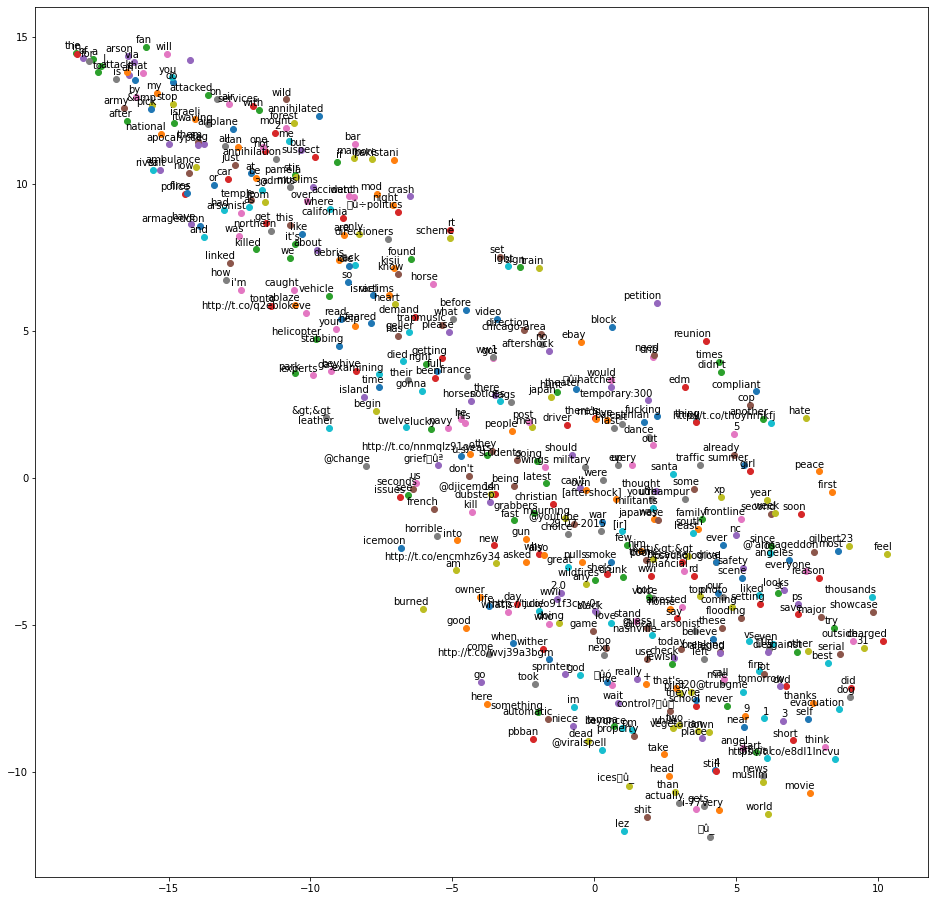

In [12]:
tsne_plot(vectors)

In [13]:
vectors.most_similar('people')

[('is', 0.7284448146820068),
 ('flag', 0.7262946963310242),
 ('for', 0.7090950012207031),
 ('a', 0.7089850902557373),
 ('be', 0.7088834643363953),
 ('after', 0.7001587152481079),
 ('of', 0.6988977193832397),
 ('an', 0.6962280869483948),
 ('arson', 0.69216388463974),
 ('national', 0.6900025606155396)]

In [14]:
vectors['all']

array([-3.51570151e-03,  9.85302846e-04, -8.25171731e-03, -3.23711103e-03,
        2.82820722e-04,  1.18430769e-02,  2.40496034e-03, -8.10022559e-03,
       -4.67934180e-03, -3.69306491e-03,  3.65149117e-06, -1.21405385e-02,
        5.96209895e-03, -6.33822335e-03, -8.79235566e-03,  1.14098331e-03,
       -3.39773088e-03, -5.62729640e-03,  7.01120647e-04, -1.70190155e-03,
        5.61333355e-03,  2.30245772e-04, -2.82206363e-03, -3.78257199e-03,
        1.24164124e-03,  6.17032871e-03, -8.56769853e-04,  3.15929041e-03,
       -8.84602545e-04, -2.32415949e-03, -5.06646605e-03,  2.55641085e-03,
        1.12605048e-03,  6.37456402e-03, -3.95834824e-04, -6.33426849e-03,
       -2.40555755e-03,  7.42042577e-03,  1.97929773e-03,  6.91821566e-03,
       -6.27469132e-03, -1.06038311e-02, -1.60342388e-04, -3.80103663e-03,
        1.35476263e-02,  5.07320603e-03, -3.79517907e-03,  1.58834015e-03,
        8.12772196e-03,  4.49376646e-03,  9.25245043e-03, -5.06211305e-03,
       -1.24278450e-02, -

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [3]:
import os

In [4]:
tweet= pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
# tweet.head(3)

In [5]:
print('There are {} rows and {} columns in train'.format(tweet.shape[0],tweet.shape[1]))
print('There are {} rows and {} columns in train'.format(test.shape[0],test.shape[1]))

There are 7613 rows and 5 columns in train
There are 3263 rows and 4 columns in train


Text(0, 0.5, 'samples')

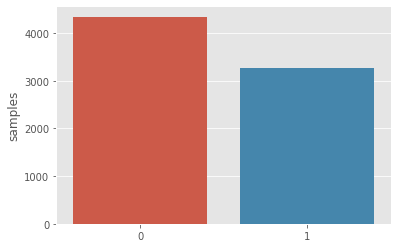

In [6]:
x=tweet.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

Text(0, 0.5, 'samples')

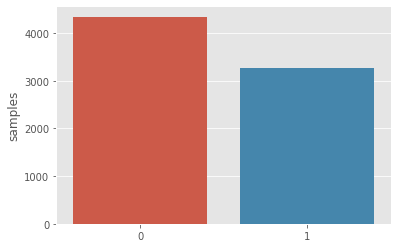

In [7]:
x=tweet.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')